In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [3]:
Sales_allmonth_data=pd.DataFrame()
for files in os.listdir('D:\PROJECTS\Sales Data\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'):
    df=pd.read_csv(f"D:\PROJECTS\Sales Data\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\{files}")
    Sales_allmonth_data=pd.concat([Sales_allmonth_data,df],ignore_index=True)


Sales_allmonth_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
Sales_allmonth_data.to_csv("D:\PROJECTS\Sales Data\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_alldata.csv")

###  Clean Data

In [5]:
Sales_allmonth_data.isnull().sum()
Sales_allmonth_data.dropna(inplace=True)

#### TASK 1 :Add Month Columns

In [6]:
Sales_allmonth_data['Month']=Sales_allmonth_data["Order Date"].str[:2]
Sales_allmonth_data=Sales_allmonth_data[Sales_allmonth_data.Month.str[:2]!='Or']
Sales_allmonth_data["Month"]=pd.to_numeric(Sales_allmonth_data["Month"])
Sales_allmonth_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### TASK 2:  Add Sales Column

In [7]:
Sales_allmonth_data['Quantity Ordered']=Sales_allmonth_data['Quantity Ordered'].astype('int')
Sales_allmonth_data['Price Each']=Sales_allmonth_data['Price Each'].astype('float')

In [8]:
Sales_allmonth_data['Sales']=Sales_allmonth_data['Quantity Ordered']*Sales_allmonth_data['Price Each']
Sales_allmonth_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 3:Add city column

In [9]:
def get_city(x):
    return str(x).split(',')[1]
def get_state(x):
    return str(x).split(' ')[-2]

In [10]:
Sales_allmonth_data['City']=Sales_allmonth_data['Purchase Address']\
.apply(lambda x: str(get_city(x))+str(f" ({get_state(x)})"))

In [11]:
Sales_allmonth_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### TASK 4: Change the order date to date time format

In [12]:
Sales_allmonth_data['Order Date']=pd.to_datetime(Sales_allmonth_data['Order Date'])


#### TASK 5: Hour and minute column 

In [13]:
Sales_allmonth_data['Hour']=Sales_allmonth_data['Order Date'].dt.hour
Sales_allmonth_data['Minute']=Sales_allmonth_data['Order Date'].dt.minute
Sales_allmonth_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


## Question 1: Which was the best month for Sales?

In [14]:
q1=Sales_allmonth_data.groupby('Month')['Sales'].sum()
q1

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

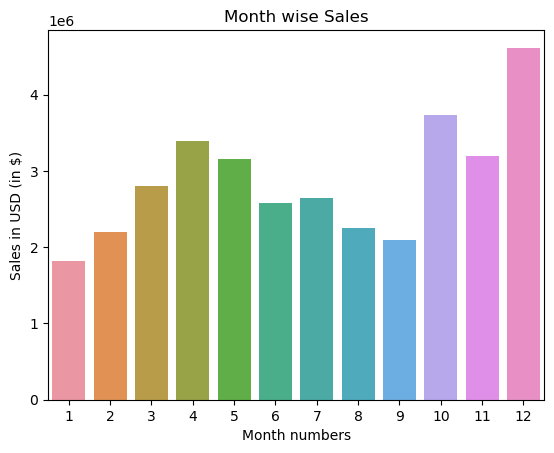

In [15]:
sns.barplot(x=q1.index,y=q1.values)
plt.title('Month wise Sales')
plt.xlabel('Month numbers')
plt.ylabel('Sales in USD (in $)')
plt.show()

### Interpretation 
The month December has seen the most number of sales and the least sales are seen in the month of January.

__Possible reason__ : 
1. The month of December is a festive season (due to Christmas and New Year). 
2. The sales were low in January because the customers have already spend most of their money in December.

## Question 2: what US city had the highets number of sales

In [16]:
q2=Sales_allmonth_data[['City','Sales']].groupby('City').sum()

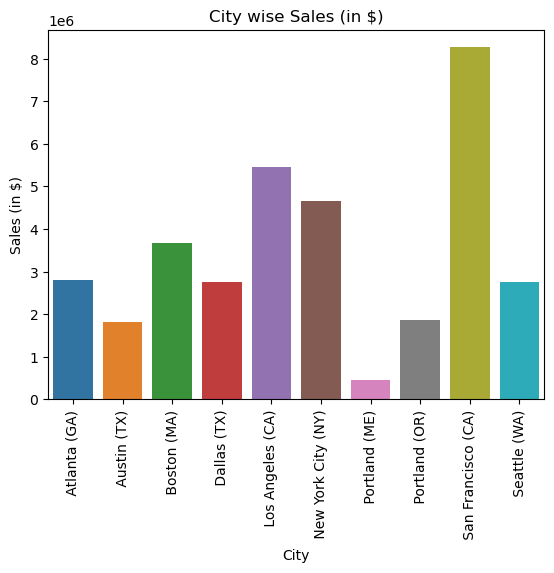

In [17]:
sns.barplot(x=q2.index,y=q2.Sales)
plt.title("City wise Sales (in $)")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Sales (in $)")
plt.show()


### Interpretation 
The sales amount were highest in San Franciso.

__Possible reason__ : 
1. San Franciso is the Silicon Valley of USA. 
2. High population density
3. Most of the high earning employee are in the city and it is the place where most of the millionaiers of the country lives there.

## Question 3: What time should we display advertisements to maximize the likelihood of customers buying product

In [18]:
hour=[hour for hour, df in Sales_allmonth_data.groupby('Hour')]## for the labels

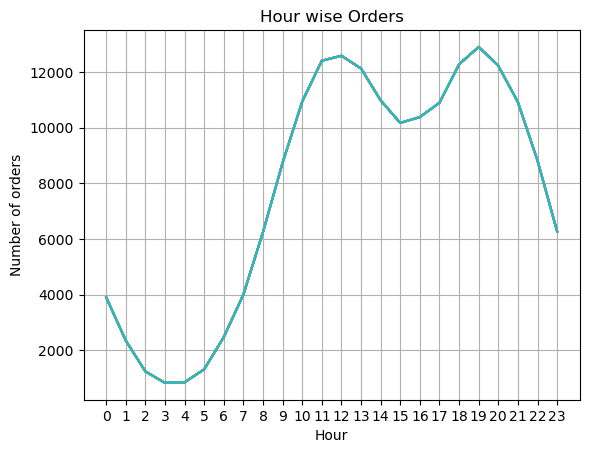

In [19]:
plt.plot(hour,Sales_allmonth_data.groupby(['Hour']).count())
plt.xticks(hour)
plt.title('Hour wise Orders')
plt.grid()
plt.ylabel("Number of orders")
plt.xlabel('Hour')
plt.show()

### Interpretation 
The highest number of orders are seen from the time 11 to 1 in the day time and 6 to 8 in the evening.

__Possible reason__ : 
1. The employees are mostly fee during the break time ie from 11- 1 pm and so they pplace orders
2. The hour 6 to 8 pm in the evening is the time where all the employees return from their workplace anf they get time to orders.

## QUESTION 4: What products are most often sold together?

In [20]:
df=Sales_allmonth_data[Sales_allmonth_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','grouped']].drop_duplicates(keep='first')
df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
from itertools import combinations
from collections import Counter

In [22]:
count =Counter()
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print (key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Interpretation 
iPhone and Lightening Charging cables are most sold together.
Google Phone anf USB-C charging cable

__Possible reason__ : 
1. The phone brand iPhone and Google Phone do not provide chrging cables along with the box. So, the customers are compleed to buy charging cables seperately

## Question 5: What product sold the most? Why do you think so?

In [23]:
q5=Sales_allmonth_data.groupby('Product')['Quantity Ordered'].sum()

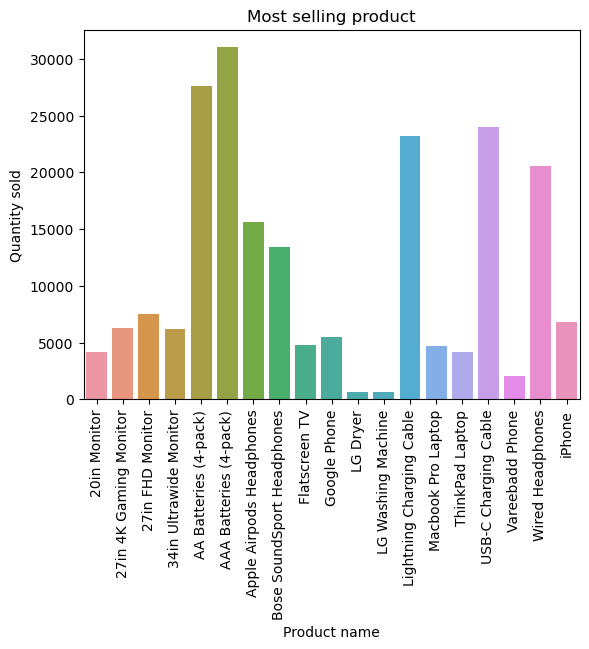

In [24]:
sns.barplot(x=q5.index,y=q5.values)
plt.title("Most selling product")
plt.xticks(rotation=90)
plt.xlabel("Product name")
plt.ylabel("Quantity sold")
plt.show()


### Interpretation 
The AAA bateries (pack of 4 ) are highes sold product.

__Possible reason__ : 
1. They are being used in almost every tech gadets like remote controls, wireless computer peripherals, digital cameras, and portable gaming consoles.
